In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D

In [7]:
BlueDataSet = np.random.multivariate_normal([1,1],[[1,0],[0,1]],200)   #label 0
RedDataSet = np.random.multivariate_normal([-1,-1],[[1,0],[0,1]],200)  #label 1

In [8]:
TrainingData = np.r_[BlueDataSet, RedDataSet]
TrainingLabel = np.r_[np.zeros((200,1)), np.ones((200,1))]
gnb = GaussianNB()
gnb.fit(TrainingData, TrainingLabel)

/Users/gexueren/opt/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

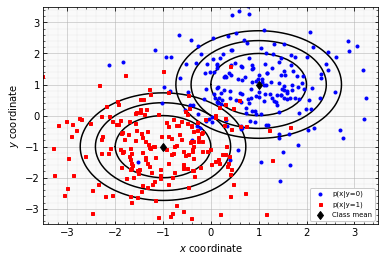

In [9]:
fid = plt.figure()
Axes = plt.subplot(1,1,1)
Axes.axes.tick_params(which='both',direction='in',top=True, right=True)
plt.minorticks_on()
Axes.set_facecolor((0,0,0,0.02))
plt.plot(BlueDataSet[:,0],BlueDataSet[:,1],'o',markersize=3,color='b',label='p(x|y=0)')
plt.plot(RedDataSet[:,0],RedDataSet[:,1],'s',markersize=3,color='r',label='p(x|y=1)')
plt.plot(-1,-1,'kd',label='Class mean')
plt.plot(1,1,'kd')
for i in range(3):
    x = y = np.arange(-4, 4, 0.1)
    x, y = np.meshgrid(x,y)
    C=plt.contour(x, y, (x-1)**2 + (y-1)**2, [i+1],colors='black')
    a = b = np.arange(-4, 4, 0.1)
    a, b = np.meshgrid(a,b)
    D=plt.contour(a, b, (a+1)**2 + (b+1)**2, [i+1],colors='black')
plt.grid(True,which='major',linewidth=0.5)
plt.grid(True,which='minor',linewidth=0.1)
plt.xlabel("$x$ coordinate")
plt.ylabel("$y$ coordinate")
plt.xlim([-3.5,3.5])
plt.ylim([-3.5,3.5])
plt.legend(loc='lower right',fontsize='x-small',framealpha=2)
plt.savefig('Q1_1')

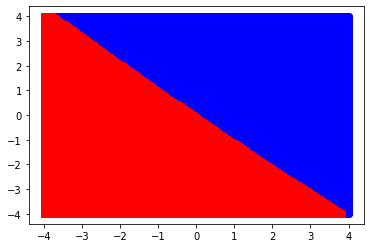

In [10]:
x_grid = np.linspace(-4,4,300)
y_grid = np.linspace(-4,4,300)
x_mesh, y_mesh = np.meshgrid(x_grid,y_grid)
PredictedLabel = gnb.predict(np.c_[x_mesh.ravel(),y_mesh.ravel()])
Xcoord = x_mesh.ravel()
Ycoord = y_mesh.ravel()
BlueRegionX = Xcoord[PredictedLabel==0]
BlueRegionY = Ycoord[PredictedLabel==0]
RedRegionX = Xcoord[PredictedLabel==1]
RedRegionY = Ycoord[PredictedLabel==1]
# RedRegion = Xcoord[PredictedLabel==-1]
plt.plot(BlueRegionX,BlueRegionY.ravel(),'bo')
plt.plot(RedRegionX,RedRegionY.ravel(),'rs')

/Users/gexueren/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The following kwargs were not used by contour: 'linewidth'
  


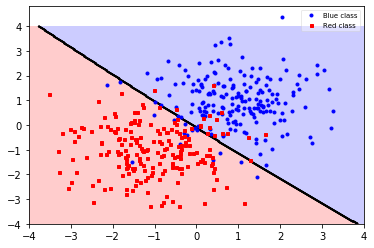

In [12]:
my_colors = [(0,0,1),(1,0,0)]#RGB
my_cm = LinearSegmentedColormap.from_list('my_cm', my_colors, N=2)
plt.contourf(x_mesh,y_mesh,PredictedLabel.reshape(300,300),levels=[-1,0,1], cmap = my_cm, alpha=0.2)
plt.plot(BlueDataSet[:,0],BlueDataSet[:,1],'o',markersize=3,color='b',label='Blue class')
plt.plot(RedDataSet[:,0],RedDataSet[:,1],'s',markersize=3,color='r',label='Red class')
plt.contour(x_mesh,y_mesh,PredictedLabel.reshape(300,300),linewidth=2,colors='k')
plt.legend(loc='best',fontsize='x-small',framealpha=0.4)
plt.savefig('Q1_2')